In [181]:
import pandas as pd
import seaborn as sns

In [73]:
test=pd.read_csv('tevhe.csv')

In [74]:
te_st=pd.to_datetime(test['Policy Start Date'])
te_end=pd.to_datetime(test['Policy End Date'])

In [75]:
test['Pol_start']= te_st.dt.year
test['Pol_end']= te_end.dt.year

In [76]:
Sub_time=te_end-te_st
test['Sub-time']=Sub_time

In [77]:
X_test=test.drop(['Policy Start Date','Policy End Date','First Transaction Date','ID'],axis=1)

In [78]:
X_test.head()

,Gender,Age,No_Pol,Car_Category,Subject_Car_Colour,Subject_Car_Make,LGA_Name,State,ProductName,Pol_start,Pol_end,Sub-time
0,Female,46,1,NaN,NaN,Ford,Abuja Municipal,Abuja-Municipal,Car Classic,2010,2011,364 days
1,Male,32,1,NaN,NaN,NaN,Kosofe,Benue,Car Classic,2010,2011,364 days
2,Female,45,2,Saloon,Black,Honda,Wuse 11,Abuja,Car Classic,2010,2011,364 days
3,Female,58,1,Saloon,NaN,TOYOTA,NaN,NaN,CarSafe,2010,2011,364 days
4,NaN,120,1,Saloon,Red,Hyundai,Victoria Island,Lagos,Car Classic,2010,2011,364 days


In [79]:
X_test.isnull().sum()

Gender                 41
Age                     0
No_Pol                  0
Car_Category          372
Subject_Car_Colour    697
Subject_Car_Make      248
LGA_Name              656
State                 656
ProductName             0
Pol_start               0
Pol_end                 0
Sub-time                0
dtype: int64

In [80]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1202 entries, 0 to 1201
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype          
---  ------              --------------  -----          
 0   Gender              1161 non-null   object         
 1   Age                 1202 non-null   int64          
 2   No_Pol              1202 non-null   int64          
 3   Car_Category        830 non-null    object         
 4   Subject_Car_Colour  505 non-null    object         
 5   Subject_Car_Make    954 non-null    object         
 6   LGA_Name            546 non-null    object         
 7   State               546 non-null    object         
 8   ProductName         1202 non-null   object         
 9   Pol_start           1202 non-null   int64          
 10  Pol_end             1202 non-null   int64          
 11  Sub-time            1202 non-null   timedelta64[ns]
dtypes: int64(4), object(7), timedelta64[ns](1)
memory usage: 112.8+ KB


In [81]:
from feature_engine import imputation

In [82]:
mdi=imputation.CategoricalImputer(imputation_method='frequent',variables='Gender')

In [83]:
X_test=mdi.fit_transform(X_test)

### MISSING DATA FOR CAR CATEGORY

In [84]:
X_test['Car_Category'].isnull().sum()

372

In [85]:
X_test['Car_Category'].value_counts()

Saloon              599
JEEP                202
Truck                11
Mini Bus              9
Bus                   2
Sedan                 2
Pick Up               2
Motorcycle            1
Pick Up > 3 Tons      1
Station 4 Wheel       1
Name: Car_Category, dtype: int64

In [86]:
mdi2=imputation.CategoricalImputer(imputation_method='missing',variables='Car_Category')

In [87]:
X_test=mdi2.fit_transform(X_test)

## MISSING DATA FOR CAR COLOUR

In [88]:
X_test['Subject_Car_Colour'].isnull().mean()

0.5798668885191348

In [89]:
X_test['Subject_Car_Colour'].isnull().sum()

697

In [90]:
mdi3=imputation.CategoricalImputer(imputation_method='missing',variables='Subject_Car_Colour')

In [91]:
X_test=mdi3.fit_transform(X_test)

## MISSING DATA FOR CAR MAKE

In [92]:
X_test['Subject_Car_Make'].isnull().mean()

0.20632279534109818

In [93]:
X_test['Subject_Car_Make'].isnull().sum()

248

In [94]:
X_test['Subject_Car_Make'].value_counts()

TOYOTA         491
Honda          103
Mercedes        56
Hyundai         55
Lexus           50
Kia             34
Nissan          26
Ford            24
Mitsubishi      12
Range Rover     12
Volkswagen      11
Land Rover       9
Iveco            9
Volvo            6
BMW              5
Pontiac          5
ACURA            4
Peugeot          4
Audi             3
Chevrolet        3
As Attached      3
.                3
Porsche          3
Infiniti         3
Mack             3
Mazda            2
Renault          2
Subaru           2
LIBERTY          2
MINI COOPER      2
GMC              1
Suzuki           1
Dodge            1
Skoda            1
DAF              1
Opel             1
Datsun           1
Name: Subject_Car_Make, dtype: int64

In [95]:
mdi4=imputation.CategoricalImputer(imputation_method='missing',variables='Subject_Car_Make')
X_test=mdi4.fit_transform(X_test)

## MISSING DATA FOR LGA NAME

In [96]:
X_test['LGA_Name'].isnull().mean()

0.5457570715474209

In [97]:
X_test['LGA_Name'].isnull().sum()

656

In [98]:
X_test['LGA_Name'].value_counts()

Victoria Island    122
Ikeja               37
Abuja Municipal     25
Eti-Osa             24
Lagos Mainland      23
                  ... 
Jos North            1
Oshodi               1
Biase                1
ENUGU EAST           1
Egbeda               1
Name: LGA_Name, Length: 115, dtype: int64

In [99]:
mdi5=imputation.CategoricalImputer(imputation_method='missing',variables='LGA_Name')
X_test=mdi5.fit_transform(X_test)

## MISSING DATA FOR STATE

In [100]:
X_test['State'].isnull().mean()

0.5457570715474209

In [101]:
mdi6=imputation.CategoricalImputer(imputation_method='missing',variables='State')
X_test=mdi6.fit_transform(X_test)

In [102]:
X_test.isnull().sum()

Gender                0
Age                   0
No_Pol                0
Car_Category          0
Subject_Car_Colour    0
Subject_Car_Make      0
LGA_Name              0
State                 0
ProductName           0
Pol_start             0
Pol_end               0
Sub-time              0
dtype: int64

In [103]:
X_test['Sub-time']=pd.to_numeric(X_test['Sub-time'].dt.days, downcast='integer')

In [104]:
X_test.head()

,Gender,Age,No_Pol,Car_Category,Subject_Car_Colour,Subject_Car_Make,LGA_Name,State,ProductName,Pol_start,Pol_end,Sub-time
0,Female,46,1,Missing,Missing,Ford,Abuja Municipal,Abuja-Municipal,Car Classic,2010,2011,364
1,Male,32,1,Missing,Missing,Missing,Kosofe,Benue,Car Classic,2010,2011,364
2,Female,45,2,Saloon,Black,Honda,Wuse 11,Abuja,Car Classic,2010,2011,364
3,Female,58,1,Saloon,Missing,TOYOTA,Missing,Missing,CarSafe,2010,2011,364
4,Male,120,1,Saloon,Red,Hyundai,Victoria Island,Lagos,Car Classic,2010,2011,364


## Feature Enginnering

# Feature engine for Gender column

In [105]:
X_test['Gender'].value_counts()

Male            780
Female          352
Entity           23
Joint Gender     15
NOT STATED       15
NO GENDER        10
SEX               7
Name: Gender, dtype: int64

In [106]:
X_test['Gender'].value_counts()/len(X_test)

Male            0.648918
Female          0.292845
Entity          0.019135
Joint Gender    0.012479
NOT STATED      0.012479
NO GENDER       0.008319
SEX             0.005824
Name: Gender, dtype: float64

In [107]:
from feature_engine.encoding import RareLabelEncoder

In [108]:
rare_enc1=RareLabelEncoder(tol=0.05,n_categories=4,variables=['Gender'])

In [109]:
X_test=rare_enc1.fit_transform(X_test)

In [110]:
X_test['Gender'].value_counts()

Male      780
Female    352
Rare       70
Name: Gender, dtype: int64

In [111]:
from feature_engine.encoding import OneHotEncoder

In [112]:
ohe1=OneHotEncoder(top_categories=4,variables=['Gender'],drop_last=False)
X_test=ohe1.fit_transform(X_test)

## Feature Eng for No Pol

In [113]:
X_test['No_Pol'].value_counts()/len(X_test)

1    0.808652
2    0.139767
3    0.042429
4    0.006656
7    0.001664
5    0.000832
Name: No_Pol, dtype: float64

In [114]:
X_test['No_Pol']=X_test['No_Pol'].map({1:1,2:2,3:3,4:3,5:3,7:3})

In [115]:
X_test['No_Pol'].value_counts()

1    972
2    168
3     62
Name: No_Pol, dtype: int64

# Car_Cate Feature eng

In [116]:
X_test['Car_Category'].value_counts()/len(X_test)

Saloon              0.498336
Missing             0.309484
JEEP                0.168053
Truck               0.009151
Mini Bus            0.007488
Bus                 0.001664
Sedan               0.001664
Pick Up             0.001664
Motorcycle          0.000832
Pick Up > 3 Tons    0.000832
Station 4 Wheel     0.000832
Name: Car_Category, dtype: float64

In [117]:
rare_enc2=RareLabelEncoder(tol=0.05,n_categories=4,variables=['Car_Category'])
X_test=rare_enc2.fit_transform(X_test)

In [118]:
X_test.Car_Category.value_counts()/len(X_test)

Saloon     0.498336
Missing    0.309484
JEEP       0.168053
Rare       0.024126
Name: Car_Category, dtype: float64

In [119]:
ohe2=OneHotEncoder(top_categories=4,variables=['Car_Category'],drop_last=False)
X_test=ohe2.fit_transform(X_test)

## Subject Car Col Feat_Eng

In [120]:
X_test.Subject_Car_Colour.value_counts()

Missing        697
Black          177
As Attached     57
Grey            51
Silver          51
Blue            37
White           28
Green           26
Red             23
Gold            19
Wine            12
Ash              9
Brown            7
B.Silver         2
Dark Gray        2
Cream            2
Dark Grey        1
Red Maroon       1
Name: Subject_Car_Colour, dtype: int64

In [121]:
X_test.Subject_Car_Colour.value_counts()/len(X_test)

Missing        0.579867
Black          0.147255
As Attached    0.047421
Grey           0.042429
Silver         0.042429
Blue           0.030782
White          0.023295
Green          0.021631
Red            0.019135
Gold           0.015807
Wine           0.009983
Ash            0.007488
Brown          0.005824
B.Silver       0.001664
Dark Gray      0.001664
Cream          0.001664
Dark Grey      0.000832
Red Maroon     0.000832
Name: Subject_Car_Colour, dtype: float64

In [122]:
rare_enc3=RareLabelEncoder(tol=0.05,n_categories=4,variables=['Subject_Car_Colour'])
X_test=rare_enc3.fit_transform(X_test)

In [123]:
X_test.Subject_Car_Colour.value_counts()

Missing    697
Rare       328
Black      177
Name: Subject_Car_Colour, dtype: int64

In [124]:
ohe3=OneHotEncoder(top_categories=4,variables=['Subject_Car_Colour'],drop_last=False)
X_test=ohe3.fit_transform(X_test)

## Subject Car make

In [125]:
X_test['Subject_Car_Make'].unique()

array(['Ford', 'Missing', 'Honda', 'TOYOTA', 'Hyundai', 'ACURA', 'Kia',
       'Nissan', 'Chevrolet', 'Range Rover', 'Mercedes', 'Infiniti',
       'Renault', 'Mazda', 'Iveco', 'Volkswagen', 'Mitsubishi', 'Suzuki',
       'Lexus', 'Skoda', 'As Attached', 'Dodge', 'Pontiac', 'Subaru',
       'Peugeot', 'Volvo', 'Land Rover', '.', 'BMW', 'MINI COOPER',
       'Mack', 'LIBERTY', 'DAF', 'GMC', 'Datsun', 'Porsche', 'Audi',
       'Opel'], dtype=object)

In [126]:
X_test['Subject_Car_Make'].value_counts()

TOYOTA         491
Missing        248
Honda          103
Mercedes        56
Hyundai         55
Lexus           50
Kia             34
Nissan          26
Ford            24
Mitsubishi      12
Range Rover     12
Volkswagen      11
Land Rover       9
Iveco            9
Volvo            6
BMW              5
Pontiac          5
ACURA            4
Peugeot          4
Chevrolet        3
Audi             3
As Attached      3
.                3
Porsche          3
Infiniti         3
Mack             3
Mazda            2
Renault          2
Subaru           2
LIBERTY          2
MINI COOPER      2
GMC              1
Suzuki           1
Dodge            1
Skoda            1
DAF              1
Opel             1
Datsun           1
Name: Subject_Car_Make, dtype: int64

In [67]:
X_test['Subject_Car_Make'].value_counts()/len(X_test)

TOYOTA         0.408486
Missing        0.206323
Honda          0.085691
Mercedes       0.046589
Hyundai        0.045757
Lexus          0.041597
Kia            0.028286
Nissan         0.021631
Ford           0.019967
Mitsubishi     0.009983
Range Rover    0.009983
Volkswagen     0.009151
Land Rover     0.007488
Iveco          0.007488
Volvo          0.004992
BMW            0.004160
Pontiac        0.004160
ACURA          0.003328
Peugeot        0.003328
Chevrolet      0.002496
Audi           0.002496
As Attached    0.002496
.              0.002496
Porsche        0.002496
Infiniti       0.002496
Mack           0.002496
Mazda          0.001664
Renault        0.001664
Subaru         0.001664
LIBERTY        0.001664
MINI COOPER    0.001664
GMC            0.000832
Suzuki         0.000832
Dodge          0.000832
Skoda          0.000832
DAF            0.000832
Opel           0.000832
Datsun         0.000832
Name: Subject_Car_Make, dtype: float64

In [127]:
rare_enc4=RareLabelEncoder(tol=0.039,n_categories=4,variables=['Subject_Car_Make'])
X_test=rare_enc4.fit_transform(X_test)

In [128]:
X_test['Subject_Car_Make'].value_counts()

TOYOTA      491
Missing     248
Rare        199
Honda       103
Mercedes     56
Hyundai      55
Lexus        50
Name: Subject_Car_Make, dtype: int64

In [130]:
X_test['Subject_Car_Make']=X_test['Subject_Car_Make'].map({'TOYOTA':'TOYOTA','Hyundai':'Rare','Missing':'Missing','Rare':'Rare',
                                                          'Honda':'Honda','Mercedes':'Mercedes','Lexus':'Lexus'})

In [131]:
X_test['Subject_Car_Make'].value_counts()

TOYOTA      491
Rare        254
Missing     248
Honda       103
Mercedes     56
Lexus        50
Name: Subject_Car_Make, dtype: int64

In [132]:
ohe4=OneHotEncoder(top_categories=6,variables=['Subject_Car_Make'],drop_last=False)
X_test=ohe4.fit_transform(X_test)

## LGA name feat_eng

In [141]:
import pandas

In [144]:
pandas.set_option('display.max_rows',lgap.shape[0]+1)

In [145]:
lgap=X_test['LGA_Name'].value_counts()/len(X_test)
lgap=pd.DataFrame(lgap)

In [147]:
print(lgap)

                        LGA_Name
Missing                 0.545757
Victoria Island         0.101498
Ikeja                   0.030782
Abuja Municipal         0.020799
Eti-Osa                 0.019967
Lekki                   0.019135
Lagos Mainland          0.019135
Lagos Island            0.018303
Surulere                0.014975
Lagos                   0.009983
Obia/Akpor              0.008319
Port-Harcourt           0.008319
Kosofe                  0.008319
Abuja                   0.006656
Shomolu                 0.005824
Amuwo-Odofin            0.005824
Alimosho                0.004992
Ibeju/Lekki             0.004992
Ikoyi                   0.004992
Warri Central           0.004160
Oshodi-Isolo            0.004160
Port Harcourt           0.004160
Festac                  0.004160
Yaba                    0.004160
Apapa                   0.004160
GBAGADA                 0.004160
Ibadan North West       0.003328
Ketu                    0.003328
Ajah                    0.002496
Warri     

In [134]:
X_test['LGA_Name'].nunique()

116

In [156]:
rare_enc5=RareLabelEncoder(tol=0.011,n_categories=5,variables=['LGA_Name'])
X_test=rare_enc5.fit_transform(X_test)

In [157]:
X_test['LGA_Name'].value_counts()

Missing            656
Rare               252
Victoria Island    122
Ikeja               37
Abuja Municipal     25
Eti-Osa             24
Lagos Mainland      23
Lekki               23
Lagos Island        22
Surulere            18
Name: LGA_Name, dtype: int64

In [158]:
ohe5=OneHotEncoder(top_categories=10,variables=['LGA_Name'],drop_last=False)
X_test=ohe5.fit_transform(X_test)

## State Feat_eng

In [160]:
X_test['State'].value_counts()/len(X_test)

Missing            0.545757
Lagos              0.256240
Benue              0.055740
Abuja-Municipal    0.020799
Eti-Osa            0.019967
Obia-Akpor         0.008319
Port-Harcourt      0.008319
Abuja              0.007488
Amuwo-Odofin       0.005824
Ogun               0.005824
Ibeju-Lekki        0.004992
Rivers             0.004160
Delta              0.004160
Oshodi-Isolo       0.004160
Anambra            0.004160
Warri-Central      0.004160
Ibadan-West        0.004160
Imo                0.003328
Edo                0.002496
Ifako-Ijaye        0.002496
Lagelu-North       0.002496
Ibadan-North       0.001664
Akwa-Ibom          0.001664
Oyo                0.001664
Nnewi-North        0.001664
Kaduna             0.001664
Enugu-North        0.001664
Osun               0.000832
Kwara              0.000832
Ogbmosho-South     0.000832
Ondo               0.000832
Idemili-south      0.000832
Kaduna-North       0.000832
ENUGU-EAST         0.000832
Ijebu-Ode          0.000832
Gombe              0

In [161]:
rare_enc6=RareLabelEncoder(tol=0.0160,n_categories=4,variables=['State'])
X_test=rare_enc6.fit_transform(X_test)

In [162]:
X_test['State'].value_counts()

Missing            656
Lagos              308
Rare               122
Benue               67
Abuja-Municipal     25
Eti-Osa             24
Name: State, dtype: int64

In [163]:
ohe6=OneHotEncoder(top_categories=6,variables=['State'],drop_last=False)
X_test=ohe6.fit_transform(X_test)

## Prod Name Feat_eng

In [164]:
X_test['ProductName'].value_counts()

Car Classic         657
CarSafe             380
Customized Motor     60
CVTP                 40
Car Plus             37
CarFlex              18
Muuve                 7
Motor Cycle           3
Name: ProductName, dtype: int64

In [165]:
X_test['ProductName'].value_counts()/len(X_test)

Car Classic         0.546589
CarSafe             0.316140
Customized Motor    0.049917
CVTP                0.033278
Car Plus            0.030782
CarFlex             0.014975
Muuve               0.005824
Motor Cycle         0.002496
Name: ProductName, dtype: float64

In [166]:
rare_enc7=RareLabelEncoder(tol=0.05,n_categories=4,variables=['ProductName'])
X_test=rare_enc7.fit_transform(X_test)

In [167]:
ohe7=OneHotEncoder(top_categories=4,variables=['ProductName'],drop_last=False)
X_test=ohe7.fit_transform(X_test)

In [169]:
X_test.head()

,Age,No_Pol,Pol_start,Pol_end,Sub-time,Gender_Male,Gender_Female,Gender_Rare,Car_Category_Saloon,Car_Category_Missing,...,LGA_Name_Surulere,State_Missing,State_Lagos,State_Rare,State_Benue,State_Abuja-Municipal,State_Eti-Osa,ProductName_Car Classic,ProductName_CarSafe,ProductName_Rare
0,46,1,2010,2011,364,0,1,0,0,1,...,0,0,0,0,0,1,0,1,0,0
1,32,1,2010,2011,364,1,0,0,0,1,...,0,0,0,0,1,0,0,1,0,0
2,45,2,2010,2011,364,0,1,0,1,0,...,0,0,0,1,0,0,0,1,0,0
3,58,1,2010,2011,364,0,1,0,1,0,...,0,1,0,0,0,0,0,0,1,0
4,120,1,2010,2011,364,1,0,0,1,0,...,0,0,1,0,0,0,0,1,0,0


## Outlier treatment

<AxesSubplot:ylabel='Age'>

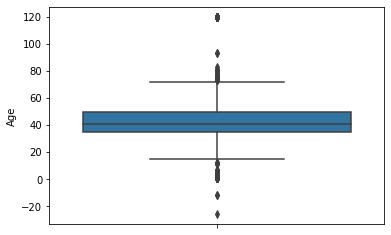

In [171]:
sns.boxplot(y=X_test['Age'])

In [172]:
from feature_engine.outliers import Winsorizer
windsoriser = Winsorizer(capping_method='iqr', # choose iqr for skewed or gaussian
                          tail='both', # cap left, right or both tails 
                          fold=1.5,
                          variables=['Age'])

In [173]:
X_test=windsoriser.fit_transform(X_test)

In [174]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1202 entries, 0 to 1201
Data columns (total 40 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         1202 non-null   float64
 1   No_Pol                      1202 non-null   int64  
 2   Pol_start                   1202 non-null   int64  
 3   Pol_end                     1202 non-null   int64  
 4   Sub-time                    1202 non-null   int16  
 5   Gender_Male                 1202 non-null   int32  
 6   Gender_Female               1202 non-null   int32  
 7   Gender_Rare                 1202 non-null   int32  
 8   Car_Category_Saloon         1202 non-null   int32  
 9   Car_Category_Missing        1202 non-null   int32  
 10  Car_Category_JEEP           1202 non-null   int32  
 11  Car_Category_Rare           1202 non-null   int32  
 12  Subject_Car_Colour_Missing  1202 non-null   int32  
 13  Subject_Car_Colour_Rare     1202 

In [175]:
X_test.to_csv('lkgood.csv')

## Merging

In [229]:
tested=pd.read_csv('tevhe.csv')
submit=pd.read_csv('arsenal.csv')

In [230]:
ID=tested['ID']

In [231]:
ID=pd.DataFrame(ID)

In [232]:
Ov_submission=pd.concat([ID,submit],axis=1)

In [233]:
Ov_submission['target'].value_counts()

0    929
1    273
Name: target, dtype: int64

In [234]:
Ov_submission=Ov_submission.iloc[:,[0,1]]

In [235]:
Ov_submission.to_csv('emirates.csv',index=False)

In [236]:
Ov_submission.head(10)

,ID,target
0,ID_01QM0NU,0
1,ID_024NJLZ,1
2,ID_02NOVWQ,1
3,ID_02VSP68,0
4,ID_02YB37K,0
5,ID_04OFD80,0
6,ID_04UA1UO,0
7,ID_06QWOUO,1
8,ID_06SOU7C,0
9,ID_0CRE393,0


In [193]:
Ov_submission[Ov_submission['ID']=='ID_024NJLZ']

,ID,target
1,ID_024NJLZ,0


In [228]:
len(Ov_submission)

1202

In [216]:
sample=pd.read_csv('Suya.csv')

In [217]:
sample.head(10)

,ID,target
0,ID_01QM0NU,0
1,ID_024NJLZ,0
2,ID_02NOVWQ,0
3,ID_02VSP68,0
4,ID_02YB37K,0
5,ID_04OFD80,0
6,ID_04UA1UO,0
7,ID_06QWOUO,0
8,ID_06SOU7C,0
9,ID_0CRE393,0


In [199]:
suya=pd.read_csv('Submission.csv')

In [200]:
suya.head()

,Unnamed: 0,ID,target
0,0,ID_01QM0NU,0
1,1,ID_024NJLZ,0
2,2,ID_02NOVWQ,0
3,3,ID_02VSP68,0
4,4,ID_02YB37K,0


In [218]:
from sklearn.model_selection import  train_test_split